In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

import PhenomA as pa
import LISA as li
import WaveformTools as wt
reload(wt)


<module 'WaveformTools' from 'WaveformTools.pyc'>

# Setup LISA object, load sky & polarization averaged transfer function, plot sensitivity curve


### LISA object options

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Tobs, default=4 yr ---- example: lisa = li.LISA(Tobs=li.YEAR)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Larm, default=2.5e9 (meters)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; NC,   default=2 (number of data channels, 1 or 2)

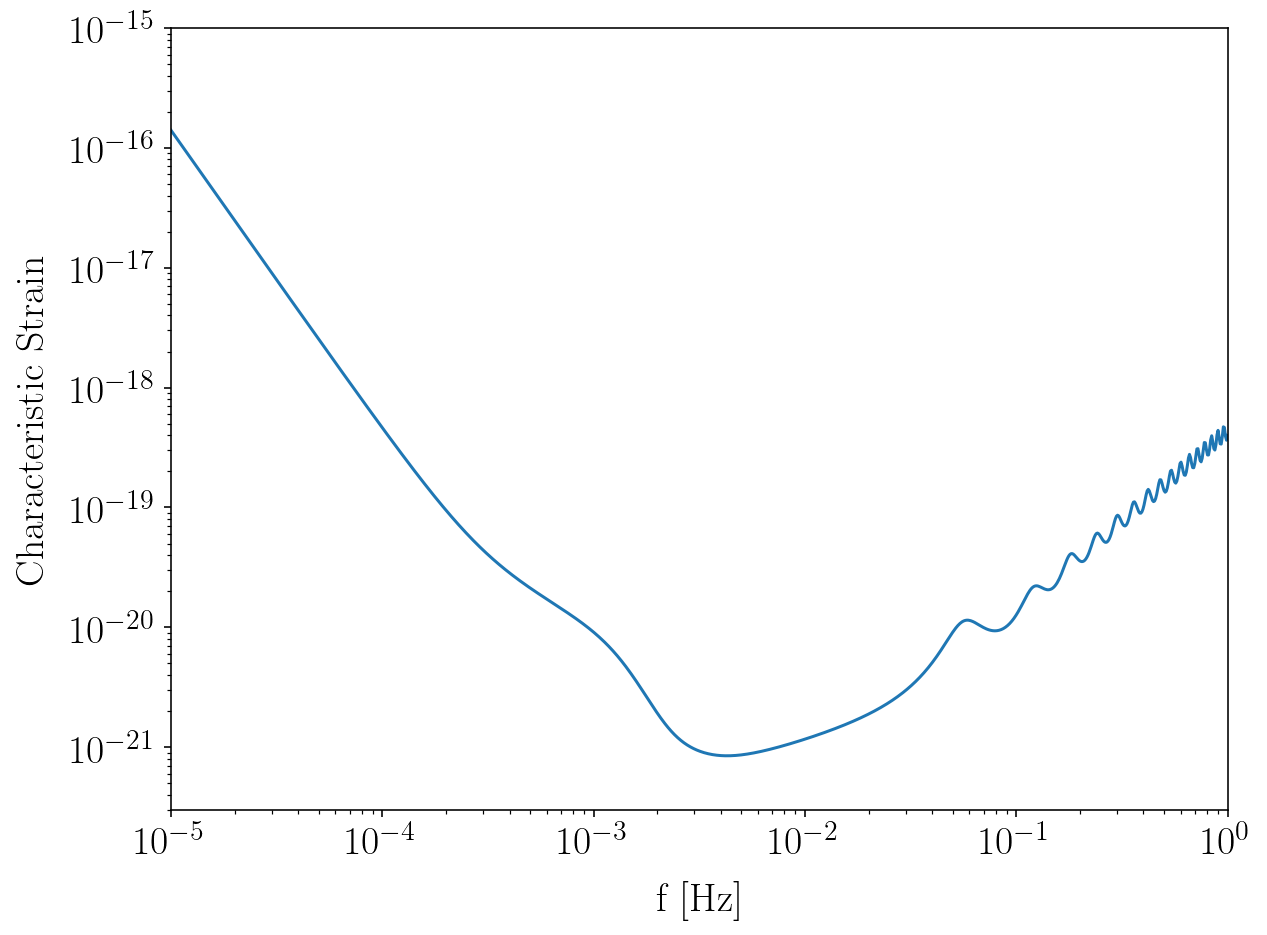

In [4]:
# create LISA object
lisa = li.LISA() 

# Plot LISA's sensitivity curve
f  = np.logspace(np.log10(1.0e-5), np.log10(1.0e0), 1000)
Sn = lisa.Sn(f)
li.PlotSensitivityCurve(f, Sn) # provide additional argument, e.g. 'SensitivityCurve.pdf', to save figure

Luminosity Distance provided. 
	redshift........... 1.68756481357e-06

SNR........ 0.12814617987


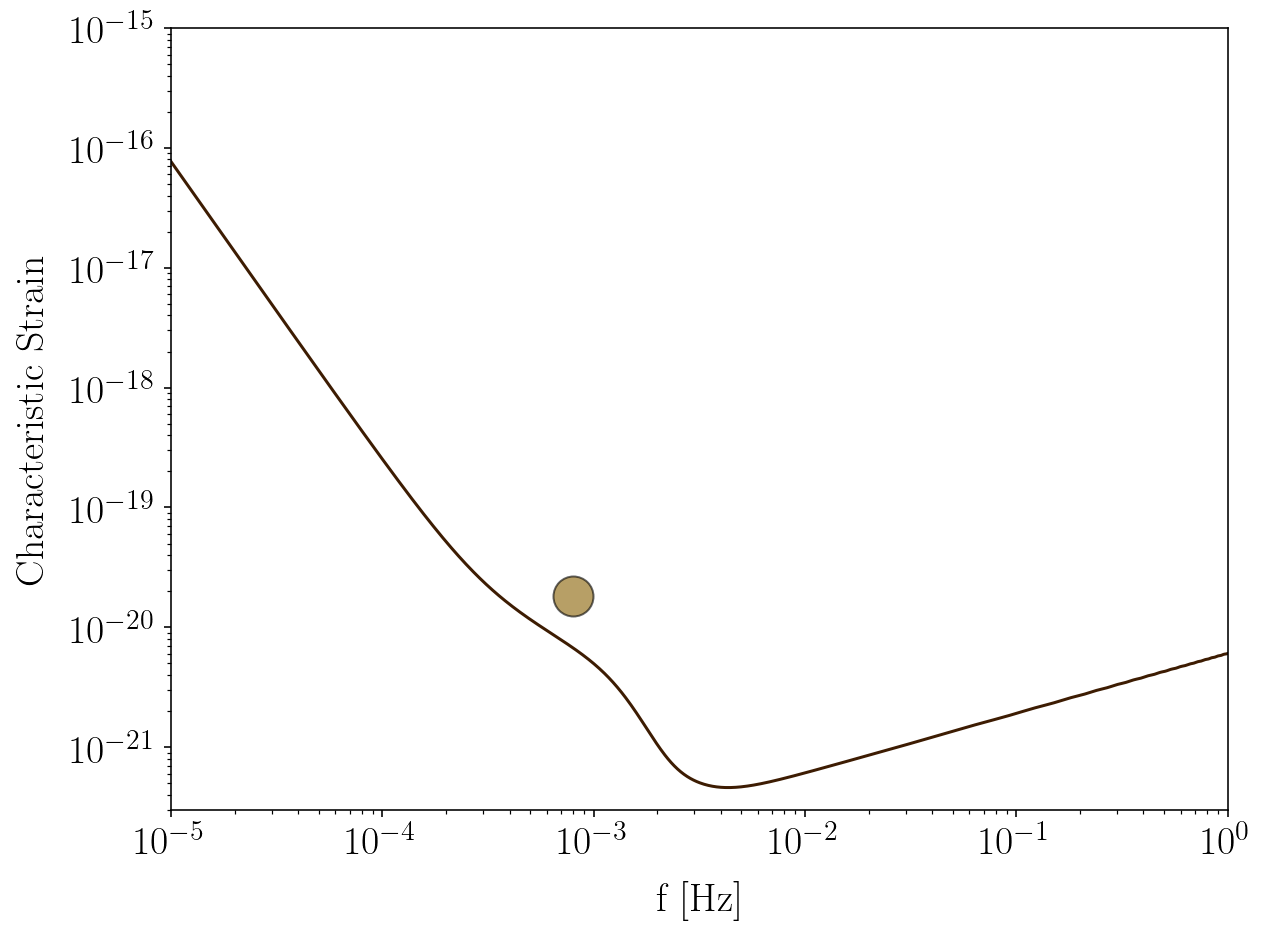

In [11]:
#m1 = 7.0*pa.TSUN
#m12= 1.4*pa.TSUN

#m2 = 0.2*pa.TSUN
#Dl = 2.0e-4*wt.MPC

m1=2.0*pa.TSUN
m2=0.02*pa.TSUN
D1 =7.3e-3*wt.MPC


f_start  = 8.e-4

theta = 0.57 #RA=153 deg =2.6 rad
phi = 0.63 #dec = +54 deg astro, 36 deg phys = 0.63 rad
iota = 0.0

binary = wt.Binary(m1, m2, Dl=Dl)
binary.f_start = f_start

binary.SetFreqBounds(lisa)

#binary2 = wt.Binary(m12, m2, Dl=Dl)
#binary2.f_start = f_start
#binary2.SetFreqBounds(lisa)

freqs, X_char = binary.CalcStrain(lisa, theta, phi, iota)
snr = binary.CalcSNR(freqs, X_char, lisa)
print("\nSNR........ {}".format(snr))
binary.PlotStrain(freqs, X_char, lisa)

plt.savefig('Justin.SN.BH.pdf', bbox_inches='tight')

# Just a check to make sure the averaging of polarization was done correctly
    # The answer (SNR) should be ~ 140

Luminosity Distance provided. 
	redshift........... 1.68756481357e-06

SNR........ 0.102519053427


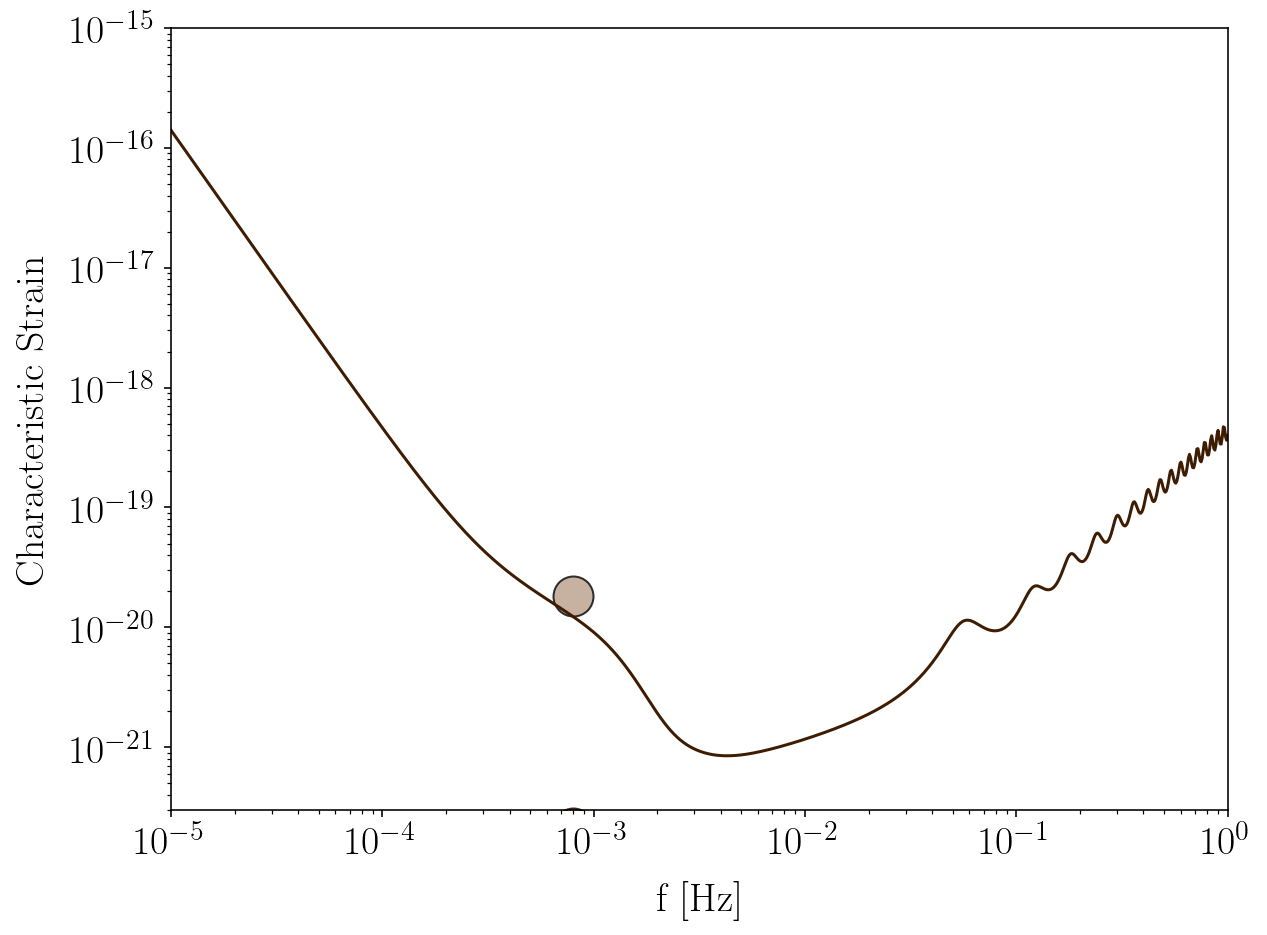

In [13]:
# sky, iota, and polarization averaged response
m1 = 2.0*pa.TSUN 
m2 = 0.02*pa.TSUN
Dl = 7.3e-3*wt.MPC
f_start  = 8e-4

binary = wt.Binary(m1, m2, Dl=Dl)
binary.f_start = f_start
binary.SetFreqBounds(lisa)

freqs, X_char = binary.CalcStrain(lisa)
snr = binary.CalcSNR(freqs, X_char, lisa)
print("\nSNR........ {}".format(snr))
binary.PlotStrain(freqs, X_char, lisa)

In [8]:
# numerically check that this polarization averaged result, when numerically averaged over theta, phi, iota,
#    return the numerically averaged result
num = 30
theta_arr = np.linspace(0, np.pi, num)
phi_arr = np.linspace(0, 2*np.pi, num)
iota_arr = np.linspace(0, np.pi, num)

tot = 0.0

for i in range(num):
    theta = theta_arr[i]
    for j in range(num):
        phi = phi_arr[j]
        for k in range(num):
            iota = iota_arr[k]
            freqs, X_char = binary.CalcStrain(lisa, theta, phi, iota)
            snr = binary.CalcSNR(freqs, X_char, lisa)

            tot += snr**2

avg_snr = np.sqrt(tot/num**3)
print(avg_snr)

5.142505077076905
